# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

You are provided with following 2 files:  

train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.  
test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

Dataset Attributes
Here is the description of all the variables:
•Variable: Definition
•ID: Unique client ID
•age: Age of the client
•job: Type of job
•marital: Marital status of the client
•education: Education level
•default: Credit in default.
•housing: Housing loan
•loan: Personal loan
•contact: Type of communication
•month: Contact month
•day_of_week: Day of week of contact
•duration: Contact duration
•campaign: number of contacts performed during this campaign to the client
•pdays: number of days that passed by after the client was last contacted
•previous: number of contacts performed before this campaign
•poutcome: outcome of the previous marketing campaign

Output variable (desired target):

• Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
train = pd.read_csv("termdeposit_train.csv")
test = pd.read_csv("termdeposit_test.csv")

In [3]:
#Checking the columns of each dataset
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
#Checking the data types of the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
#Checking the shapes of each dataset
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

Data Exploration

In [9]:
#Printing the first 5 rows of the train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
#Printing the first 5 rows of the test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [11]:
#checking for missing values in train dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
#Checking for missing values in test dataset
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
for feature in train.columns: 
    if train[feature].dtype == 'object': 
        train[feature] = pd.Categorical(train[feature])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          31647 non-null  int64   
 1   age         31647 non-null  int64   
 2   job         31647 non-null  category
 3   marital     31647 non-null  category
 4   education   31647 non-null  category
 5   default     31647 non-null  category
 6   balance     31647 non-null  int64   
 7   housing     31647 non-null  category
 8   loan        31647 non-null  category
 9   contact     31647 non-null  category
 10  day         31647 non-null  int64   
 11  month       31647 non-null  category
 12  duration    31647 non-null  int64   
 13  campaign    31647 non-null  int64   
 14  pdays       31647 non-null  int64   
 15  previous    31647 non-null  int64   
 16  poutcome    31647 non-null  category
 17  subscribed  31647 non-null  category
dtypes: category(10), int64(8)
memory usage: 2.2 MB

In [15]:
print(train.job.value_counts())
print('\n',train.marital.value_counts())
print('\n',train.education.value_counts())
print('\n',train.default.value_counts())
print('\n',train.housing.value_counts())
print('\n',train.loan.value_counts())
print('\n',train.contact.value_counts())
print('\n',train.month.value_counts())
print('\n',train.poutcome.value_counts())

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

 marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

 education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

 default
no     31062
yes      585
Name: count, dtype: int64

 housing
yes    17584
no     14063
Name: count, dtype: int64

 loan
no     26516
yes     5131
Name: count, dtype: int64

 contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

 month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64

 poutcome
unknown    25929
failure     3362
oth

In [118]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "subscribed":    {"no": 0, "yes": 1} 
                    }

train=train.replace(replaceStruct)
train.head(2)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,-1,0,1933,0,0,19,11,44,2,-1,0,2,0
1,31,-1,2,2,0,3,0,0,20,7,91,2,-1,0,2,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          31647 non-null  int64   
 1   age         31647 non-null  int64   
 2   job         31647 non-null  category
 3   marital     31647 non-null  category
 4   education   31647 non-null  category
 5   default     31647 non-null  category
 6   balance     31647 non-null  int64   
 7   housing     31647 non-null  category
 8   loan        31647 non-null  category
 9   contact     31647 non-null  category
 10  day         31647 non-null  int64   
 11  month       31647 non-null  category
 12  duration    31647 non-null  int64   
 13  campaign    31647 non-null  int64   
 14  pdays       31647 non-null  int64   
 15  previous    31647 non-null  int64   
 16  poutcome    31647 non-null  category
 17  subscribed  31647 non-null  category
dtypes: category(10), int64(8)
memory usage: 2.2 MB

In [18]:
for feature in test.columns: 
    if test[feature].dtype == 'object': 
        test[feature] = pd.Categorical(test[feature])

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         13564 non-null  int64   
 1   age        13564 non-null  int64   
 2   job        13564 non-null  category
 3   marital    13564 non-null  category
 4   education  13564 non-null  category
 5   default    13564 non-null  category
 6   balance    13564 non-null  int64   
 7   housing    13564 non-null  category
 8   loan       13564 non-null  category
 9   contact    13564 non-null  category
 10  day        13564 non-null  int64   
 11  month      13564 non-null  category
 12  duration   13564 non-null  int64   
 13  campaign   13564 non-null  int64   
 14  pdays      13564 non-null  int64   
 15  previous   13564 non-null  int64   
 16  poutcome   13564 non-null  category
dtypes: category(9), int64(8)
memory usage: 968.9 KB


In [20]:
print(test.job.value_counts())
print('\n',test.marital.value_counts())
print('\n',test.education.value_counts())
print('\n',test.default.value_counts())
print('\n',test.housing.value_counts())
print('\n',test.loan.value_counts())
print('\n',test.contact.value_counts())
print('\n',test.month.value_counts())
print('\n',test.poutcome.value_counts())

job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: count, dtype: int64

 marital
married     8119
single      3868
divorced    1577
Name: count, dtype: int64

 education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: count, dtype: int64

 default
no     13334
yes      230
Name: count, dtype: int64

 housing
yes    7546
no     6018
Name: count, dtype: int64

 loan
no     11451
yes     2113
Name: count, dtype: int64

 contact
cellular     8862
unknown      3843
telephone     859
Name: count, dtype: int64

 month
may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: count, dtype: int64

 poutcome
unknown    11030
failure     1539
other        55

In [21]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2}, 
                    }

test=test.replace(replaceStruct)
test.head(3)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,5,2,2,0,118,1,0,1,15,5,20,6,-1,0,-1
1,40403,78,6,3,1,0,2787,0,0,2,1,7,372,1,-1,0,-1
2,3709,31,7,1,3,0,144,1,0,-1,16,5,676,1,-1,0,-1


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         13564 non-null  int64   
 1   age        13564 non-null  int64   
 2   job        13564 non-null  category
 3   marital    13564 non-null  category
 4   education  13564 non-null  category
 5   default    13564 non-null  category
 6   balance    13564 non-null  int64   
 7   housing    13564 non-null  category
 8   loan       13564 non-null  category
 9   contact    13564 non-null  category
 10  day        13564 non-null  int64   
 11  month      13564 non-null  category
 12  duration   13564 non-null  int64   
 13  campaign   13564 non-null  int64   
 14  pdays      13564 non-null  int64   
 15  previous   13564 non-null  int64   
 16  poutcome   13564 non-null  category
dtypes: category(9), int64(8)
memory usage: 968.9 KB


In [23]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [24]:
test.isnull().sum() 

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [25]:
#statistical values of dataet
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Data Visualization

In [26]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

subscribed
0    27932
1     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

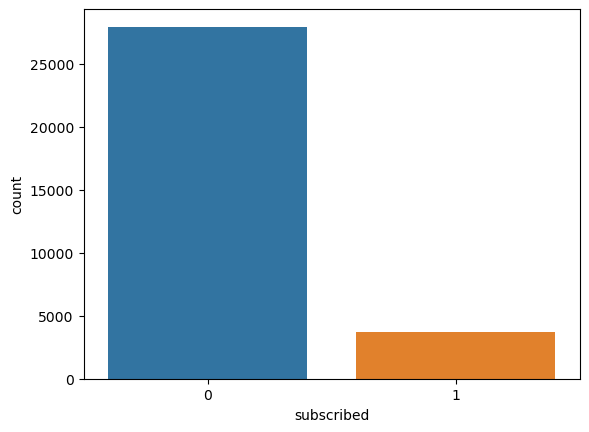

In [27]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [28]:
#Frequency table
train['job'].value_counts()

job
1     6842
2     6639
3     5307
4     3631
5     2903
6     1574
7     1123
8     1008
9      905
10     874
11     635
-1     206
Name: count, dtype: int64

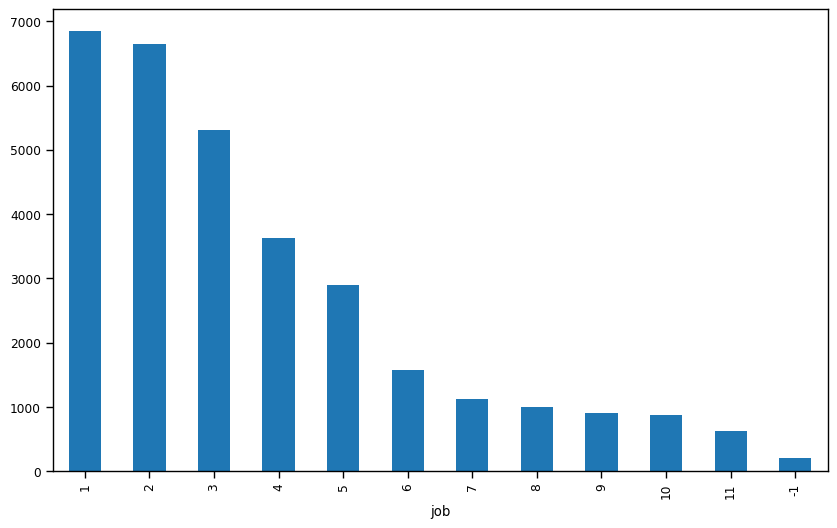

In [29]:
# Plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

In [30]:
train['marital'].value_counts()

marital
2    19095
1     8922
3     3630
Name: count, dtype: int64

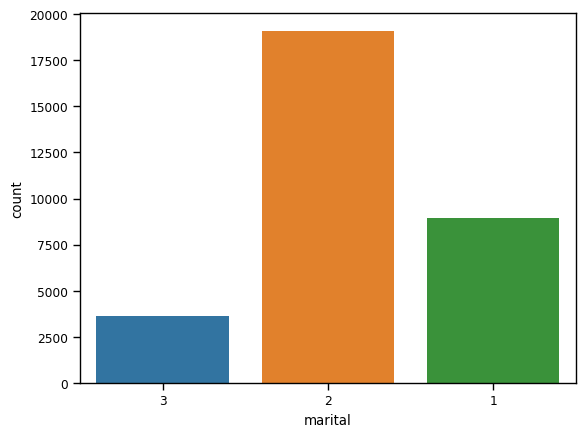

In [31]:
sns.countplot(data=train, x='marital');

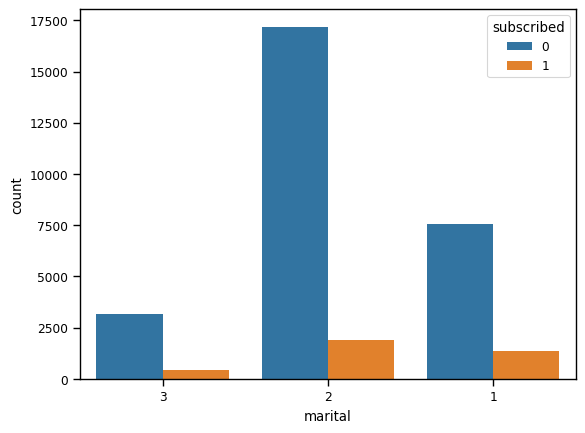

In [32]:
sns.countplot(data=train, x='marital', hue='subscribed');

FROM THE ABOVE GRAPH WE CAN SEE THAT MARRIED PEOPLE MADE MORE TERM DEPOSITS

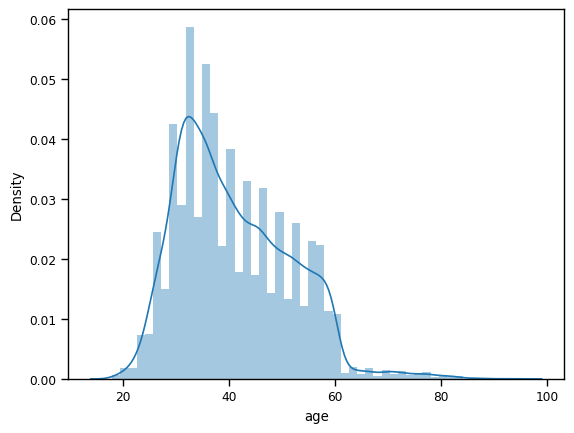

In [33]:
sns.distplot(train['age']);

We can infer that most of the clients fall in the age group between 20-60.

In [34]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

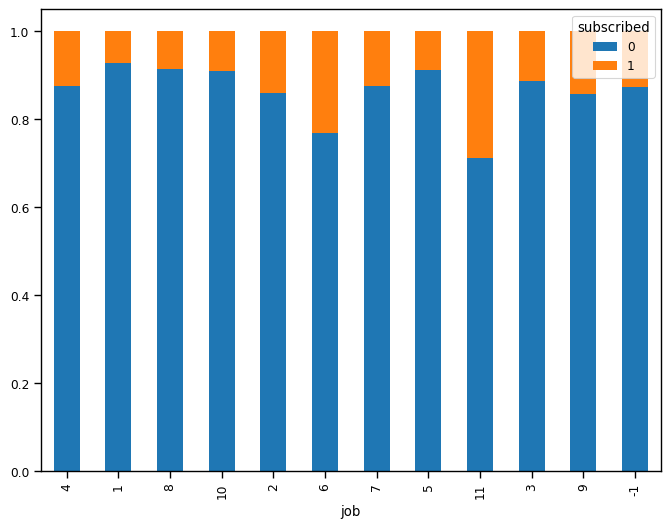

In [35]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [36]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,0,1
marital,,
3,3185,445
2,17176,1919
1,7571,1351


In [37]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

subscribed,0,1
marital,,
3,0.877410,0.122590
2,0.899502,0.100498
1,0.848577,0.151423


<Axes: xlabel='marital'>

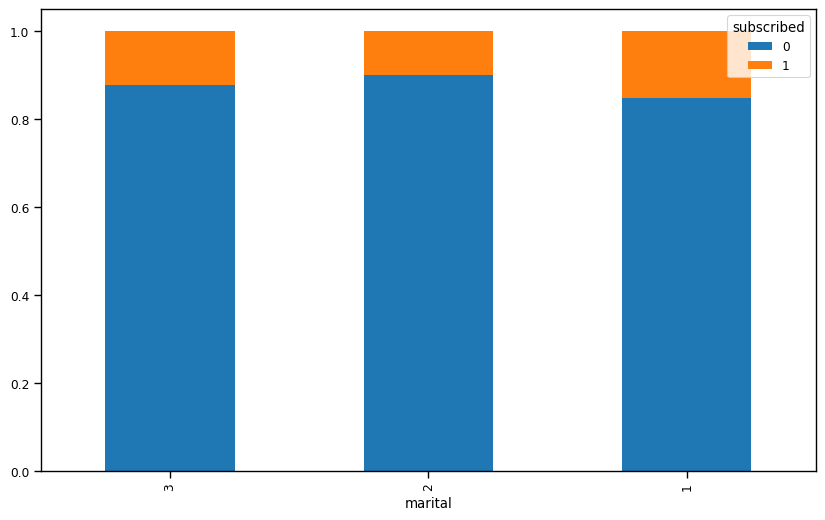

In [38]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits

In [39]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,0,1
default,,
0,0.881720,0.118280
1,0.929915,0.070085


<Axes: xlabel='default'>

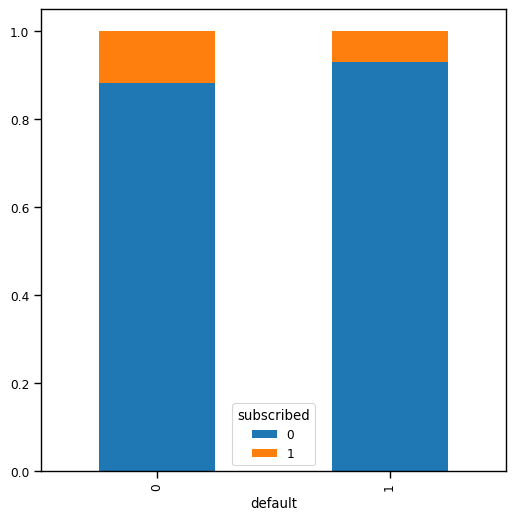

In [40]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Checking the presence of outliers :-

<Axes: >

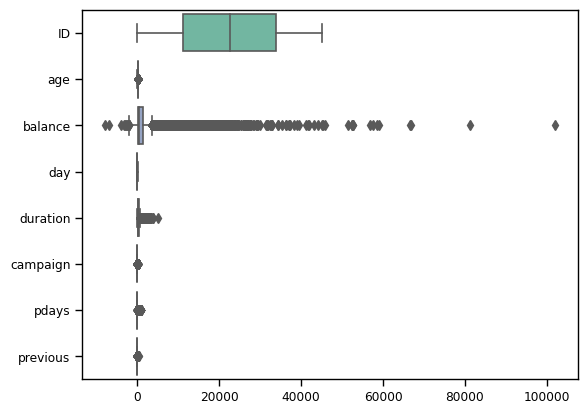

In [41]:
sns.boxplot(data=train, orient="h", palette="Set2", dodge=False)

From above boxplot we can see there are outliers present in the dataset. By above plot we can clearly see that the age, balance, duration, campaign, pdays, and previous columns have outliers

In [42]:
Q1 =  train['balance'].quantile(0.25) # 1º Quartile
Q3 =  train['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', train[train['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', train[train['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1358.0
Numerber of outliers in balance column below the lower whisker : 12
Numerber of outliers above balance column the uper whisker  : 3287


In [43]:
for i in train.describe().columns:
    Q1 = train.describe().at['25%', i]
    Q3 = train.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', train[train[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', train[train[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (train[train[i] < LTV][i].count()) + (train[train[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : ID
Interquartile range IQR                             : 22661.5
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 349
Total Numbers of Ourliers                           : 349


Column Name                                         : balance
Interquartile range IQR                             : 1358.0
Numerber of outliers below the lower whisker        : 12
Numerber of outliers above the upper whisker         : 3287
Total Numbers of Ourliers                           : 3299


Column Name                                         : day
Interquartile range IQR                             : 13.0


<Axes: >

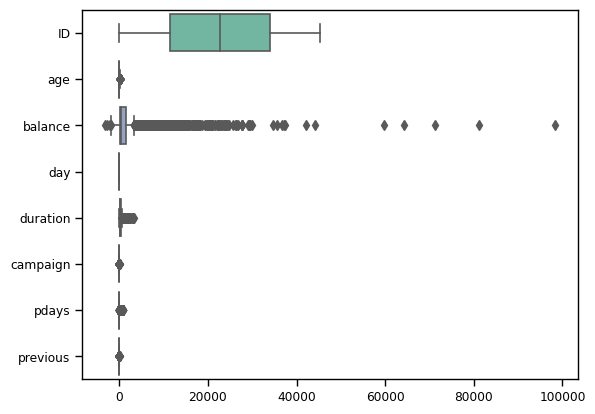

In [44]:
sns.boxplot(data=test, orient="h", palette="Set2", dodge=False)

In [45]:
Q1 =  test['balance'].quantile(0.25) # 1º Quartile
Q3 =  test['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', test[test['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', test[test['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1342.25
Numerber of outliers in balance column below the lower whisker : 5
Numerber of outliers above balance column the uper whisker  : 1425


In [46]:
for i in test.describe().columns:
    Q1 = test.describe().at['25%', i]
    Q3 = test.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', test[test[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', test[test[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (test[test[i] < LTV][i].count()) + (test[test[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : ID
Interquartile range IQR                             : 22428.25
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 138
Total Numbers of Ourliers                           : 138


Column Name                                         : balance
Interquartile range IQR                             : 1342.25
Numerber of outliers below the lower whisker        : 5
Numerber of outliers above the upper whisker         : 1425
Total Numbers of Ourliers                           : 1430


Column Name                                         : day
Interquartile range IQR                             : 13.0

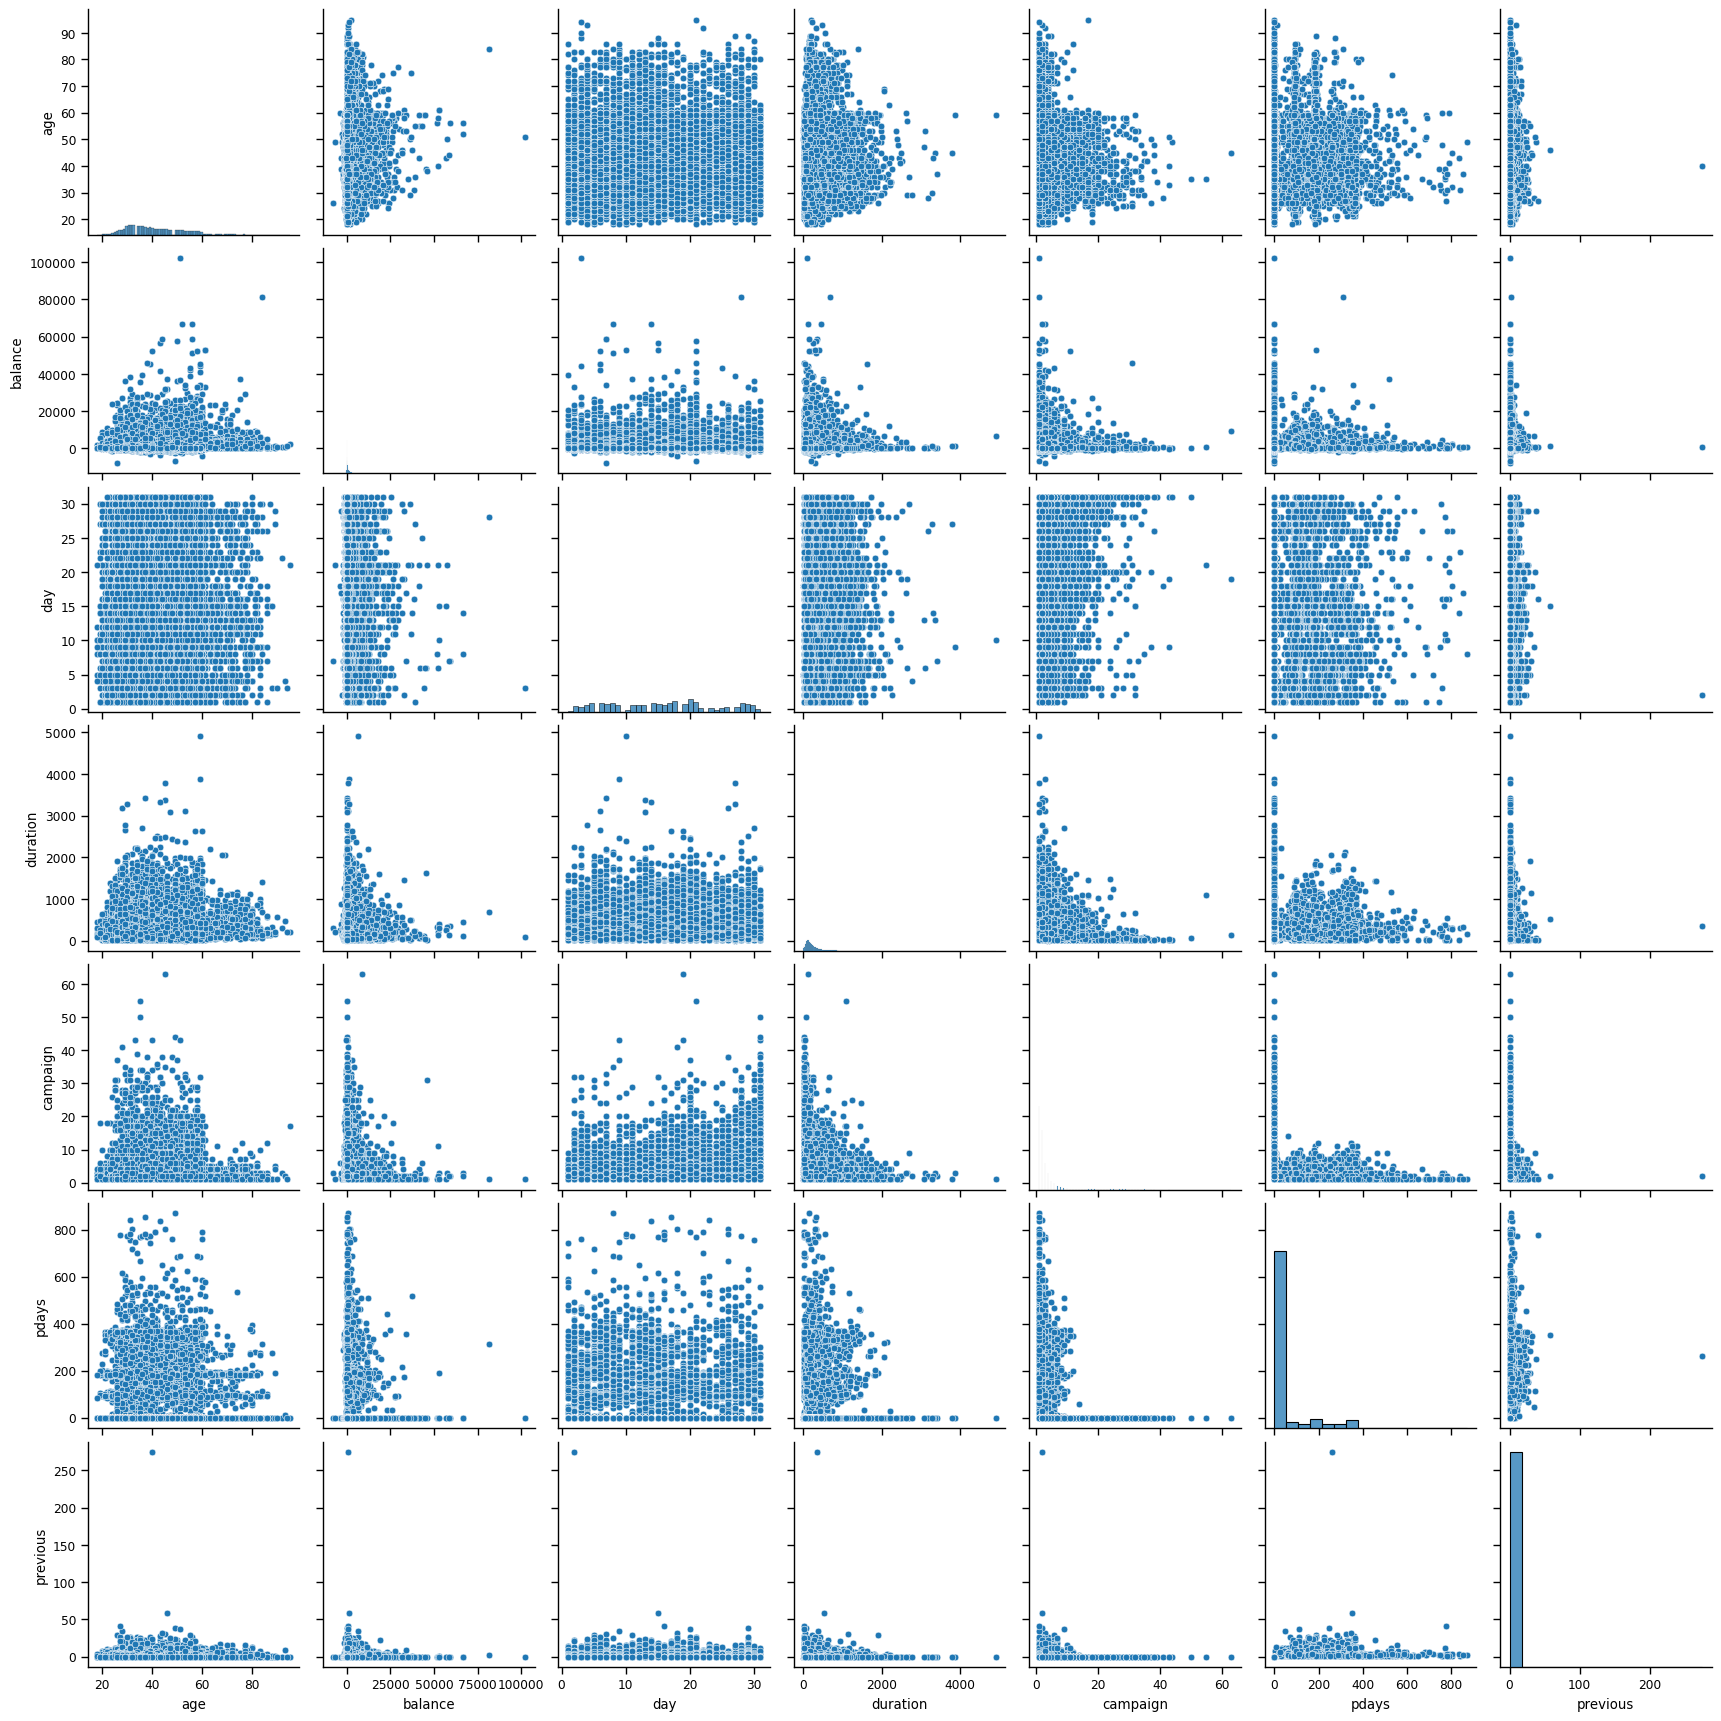

In [47]:
sns.pairplot(train.iloc[:,1:])

In [48]:
subscriber_counts = pd.DataFrame(train["subscribed"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","subscribed"]
subscriber_counts

,Labels,subscribed
0,0,27932
1,1,3715


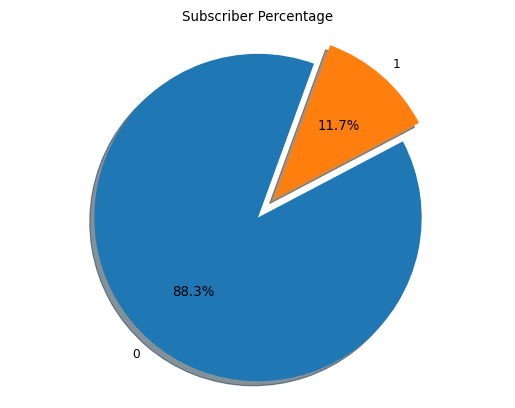

In [49]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["subscribed"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

<Axes: title={'center': 'Correlation of Attributes'}>

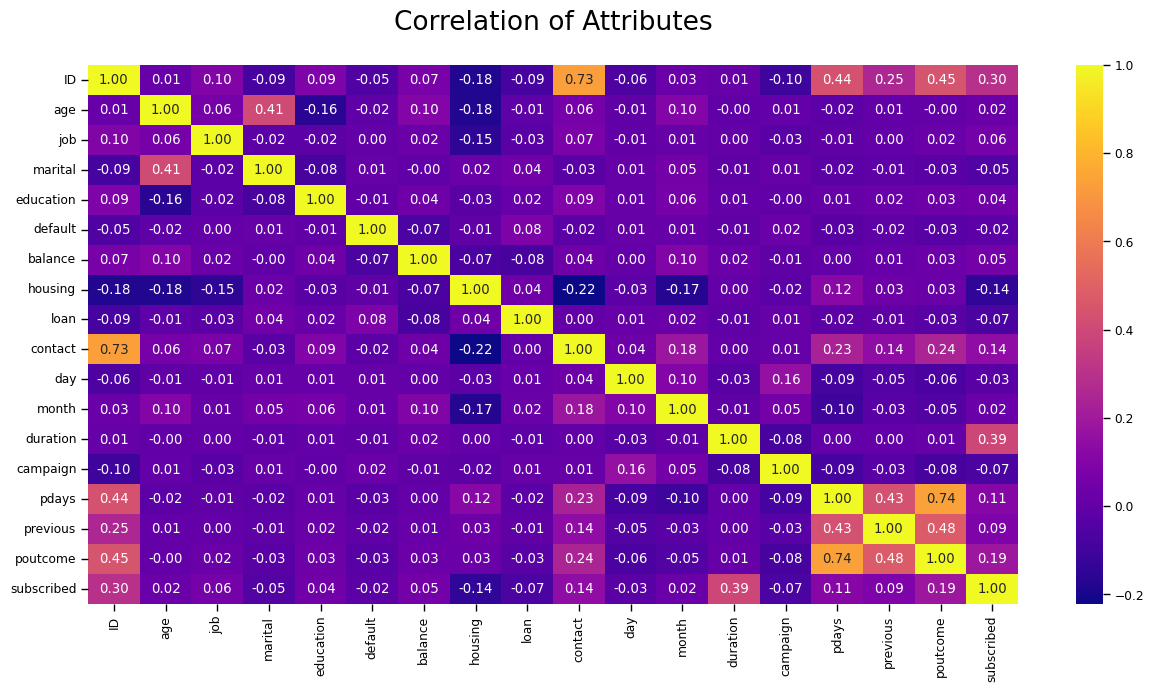

In [50]:
#Correlation using Heatmap
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(train.corr(), cmap='plasma',annot=True, fmt='.2f')

Campaign outcome' has a strong correlation with 'duration',  
A moderate correlation between 'Campaign outcome' and 'previous contacts'.  
Mild correlations between 'balance', 'month of contact' and 'number of campaign'.  

As we have seen above id,'Contact' is not relevent for our model building so we will drop it.

In [51]:
train = train.drop(['ID','contact'], axis=1)

In [52]:
train.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,-1,0,1933,0,0,19,11,44,2,-1,0,-1,0


In [53]:
test = test.drop(['ID','contact'], axis=1)

In [54]:
test.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,32,5,2,2,0,118,1,0,15,5,20,6,-1,0,-1
1,78,6,3,1,0,2787,0,0,1,7,372,1,-1,0,-1
2,31,7,1,3,0,144,1,0,16,5,676,1,-1,0,-1
3,57,5,1,1,0,3777,1,0,13,5,65,2,-1,0,-1
4,45,1,3,2,0,-705,0,1,3,7,111,1,-1,0,-1


Replacement of unknown with others in poutcome column :  
Here in poutcome column there are values 'other' and 'unknown' which dont give any significant insight so I will replace 'unknown' with 'others' . As I have already encoded 'poutcome' column, now we just need to replace -1 to 2

In [55]:
train.loc[train['poutcome'] == -1, 'poutcome'] = 2
train['poutcome'].head(4)

0    2
1    2
2    2
3    1
Name: poutcome, dtype: category
Categories (4, int64): [0, 2, 1, -1]

In [56]:
test.loc[test['poutcome'] == -1, 'poutcome'] = 2
test['poutcome'].head(4)

0    2
1    2
2    2
3    2
Name: poutcome, dtype: category
Categories (4, int64): [0, 2, 1, -1]

Model Building

Spliting the data into training and test set in the ratio of 70:30 respectively

In [57]:
X = train.drop('subscribed', axis=1)
y = train[['subscribed']]
train.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,-1,0,1933,0,0,19,11,44,2,-1,0,2,0


In [58]:
X

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,56,4,2,-1,0,1933,0,0,19,11,44,2,-1,0,2
1,31,-1,2,2,0,3,0,0,20,7,91,2,-1,0,2
2,27,5,2,2,0,891,1,0,18,7,240,1,-1,0,2
3,57,2,3,3,0,3287,0,0,22,6,867,1,84,3,1
4,31,3,2,2,0,119,1,0,4,2,380,1,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,2,1,3,0,0,1,0,12,5,116,2,-1,0,2
31643,53,2,3,3,0,380,0,1,5,6,438,2,-1,0,2
31644,32,2,1,3,0,312,0,0,7,8,37,3,-1,0,2
31645,57,3,2,2,0,225,1,0,15,5,22,7,337,12,0


In [59]:
y

,subscribed
0,0
1,0
2,0
3,1
4,0
...,...
31642,0
31643,1
31644,0
31645,0


In [60]:
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [61]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (22152, 15)
y train data (22152, 1)
x test data  (9495, 15)
y test data  (9495, 1)


Logistic Regression

In [62]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [63]:
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)


In [64]:
from sklearn.metrics import confusion_matrix
LogReg = LogisticRegression(solver = 'lbfgs')
# Train the logistic regression model on the training data
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred = LogReg.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, LogReg_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, LogReg_y_pred)
precision = precision_score(y_test, LogReg_y_pred)
recall = recall_score(y_test, LogReg_y_pred)
f1 = f1_score(y_test, LogReg_y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Perform cross-validation
cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame to store the results
base_model_results = pd.DataFrame([['Logistic Regression', accuracy, precision, recall, f1, cross_validation_result.mean(), cross_validation_result.std()]], 
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

# Print the Logistic Regression classification report
print('\nLogistic Regression Classification Report:\n', metrics.classification_report(y_test, LogReg_y_pred))


Confusion Matrix:
[[8238  163]
 [ 865  229]]
Accuracy: 0.8917324907846235
Precision: 0.5841836734693877
Recall: 0.2093235831809872
F1-score: 0.3082099596231494

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      8401
           1       0.58      0.21      0.31      1094

    accuracy                           0.89      9495
   macro avg       0.74      0.59      0.62      9495
weighted avg       0.87      0.89      0.87      9495



K-Nearest Neighbors (K-NN) 

In [65]:

# Initialize the K-Nearest Neighbors classifier
Knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')

# Train the KNN model on the training data
Knn.fit(X_train, y_train.values.ravel())

# Predicting for the test set
Knn_y_pred = Knn.predict(X_test)
Knn_ScoreAccuracy = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisionScore = precision_score(y_test, Knn_y_pred)
Knn_RecallScore = recall_score(y_test, Knn_y_pred)
Knn_F1 = f1_score(y_test, Knn_y_pred)

# Perform cross-validation
cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame to store the results
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisionScore,
                                    Knn_RecallScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

# Concatenate the results with the base_model_results DataFrame
base_model_results = pd.concat([base_model_results, knn_models_results], ignore_index=True)

# Print the K-Nearest Neighbors classification report
print('\nK-Nearest Neighbors (K-NN) Classification Report:\n', metrics.classification_report(y_test, Knn_y_pred))




K-Nearest Neighbors (K-NN) Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8401
           1       0.59      0.29      0.39      1094

    accuracy                           0.89      9495
   macro avg       0.75      0.63      0.67      9495
weighted avg       0.88      0.89      0.88      9495



In [66]:

# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, Knn_y_pred)

# Print the confusion matrix
print("Confusion Matrix for K-Nearest Neighbors:")
print(conf_matrix_knn)


Confusion Matrix for K-Nearest Neighbors:
[[8176  225]
 [ 772  322]]


In [67]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.891732,0.584184,0.209324,0.308210,0.889265,0.005394
1,K-Nearest Neighbors,0.894997,0.588665,0.294333,0.392444,0.895494,0.005053


SVM 

Naive Bayes

In [70]:
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())

# Predicting for test set
GNB_y_pred = GNB.predict(X_test)

# Calculate evaluation metrics
GNB_ScoreAccuracy = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisionScore = precision_score(y_test, GNB_y_pred)
GNB_RecallScore = recall_score(y_test, GNB_y_pred)
GNB_F1 = f1_score(y_test, GNB_y_pred)

# Perform cross-validation
cross_validation_result = model_selection.cross_val_score(GNB, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame to store the results
GNB_models_results = pd.DataFrame([['Naive Bayes (Gaussian)', GNB_ScoreAccuracy, GNB_PrecisionScore,
                                    GNB_RecallScore, GNB_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

# Concatenate the results with the base_model_results DataFrame
base_model_results = pd.concat([base_model_results, GNB_models_results], ignore_index=True)

# Print the Gaussian Naive Bayes classification report
print('\nGNB Classification Report:\n', metrics.classification_report(y_test, GNB_y_pred))



GNB Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      8401
           1       0.33      0.43      0.38      1094

    accuracy                           0.83      9495
   macro avg       0.63      0.66      0.64      9495
weighted avg       0.86      0.83      0.84      9495



In [74]:
# Calculate the confusion matrix for Gaussian Naive Bayes
conf_matrix_gnb = confusion_matrix(y_test, GNB_y_pred)

# Print the confusion matrix for Gaussian Naive Bayes
print("Confusion Matrix for Gaussian Naive Bayes:")
print(conf_matrix_gnb)



Confusion Matrix for Gaussian Naive Bayes:
[[7451  950]
 [ 620  474]]


In [73]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.891732,0.584184,0.209324,0.308210,0.889265,0.005394
1,K-Nearest Neighbors,0.894997,0.588665,0.294333,0.392444,0.895494,0.005053
2,Naive Bayes (Gaussian),0.834650,0.332865,0.433272,0.376489,0.836448,0.003399


In [76]:
# Train the Decision Tree model on the training data
dTree.fit(X_train, y_train)

# Predicting for test set
dTree_y_pred = dTree.predict(X_test)

# Calculate evaluation metrics
dTree_ScoreAccuracy = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisionScore = precision_score(y_test, dTree_y_pred)
dTree_RecallScore = recall_score(y_test, dTree_y_pred)
dTree_F1 = f1_score(y_test, dTree_y_pred)

# Perform cross-validation
cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, cv=kfold, scoring='accuracy')

# Create a DataFrame to store the results
dTree_models_results = pd.DataFrame([['Decision Tree', dTree_ScoreAccuracy, dTree_PrecisionScore,
                                       dTree_RecallScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

# Concatenate the results with the base_model_results DataFrame
base_model_results = pd.concat([base_model_results, dTree_models_results], ignore_index=True)

# Print the Decision Tree classification report
print('\nDecision Tree Classification Report:\n', metrics.classification_report(y_test, dTree_y_pred))



Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      8401
           1       0.44      0.47      0.45      1094

    accuracy                           0.87      9495
   macro avg       0.68      0.70      0.69      9495
weighted avg       0.87      0.87      0.87      9495



In [128]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Decision Tree
conf_matrix_dTree = confusion_matrix(y_test, dTree_y_pred)

# Print the confusion matrix for Decision Tree
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dTree)


Confusion Matrix for Decision Tree:
[[7739  662]
 [ 579  515]]


In [127]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.891732,0.584184,0.209324,0.308210,0.889265,0.005394
1,K-Nearest Neighbors,0.894997,0.588665,0.294333,0.392444,0.895494,0.005053
2,Naive Bayes (Gaussian),0.834650,0.332865,0.433272,0.376489,0.836448,0.003399
3,Decision Tree,0.869300,0.437553,0.470750,0.453545,0.870351,0.005129


Base Model Comparison : From the above confusion matrix, and Accuracy Table we can see that k-nearet neighbors and Logistic Regression obtained the highest accuracy with lesser runtime and is more stable in the results.